<a href="https://colab.research.google.com/github/rajpprithiv/testdata/blob/main/Big_Data_Mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Data Collection and Analysis

In [120]:
#Loading a Dataset from csv file to pandas

big_mart_data = pd.read_csv("/content/train_v9rqX0R.csv")

big_mart_data_test = pd.read_csv("/content/test_AbJTz2l.csv")
big_mart_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [123]:
# number of datapoints and data features
big_mart_data.shape


(8523, 12)

In [124]:
big_mart_data_test.shape


(5681, 11)

In [23]:
# Getting somedetails about the datatset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [125]:
big_mart_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Categorical Format:

*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Type
*   Outlet_Location_Type

















In [24]:
# null values appear in two in 2 features(Item_Weight,Outlet_Size)
# clear the null values from the 2 features
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Handle the missing numbers

In [31]:
# if the dtype is in numerical we have to take 'mean'(avg of values) for that feature
# if the dtype is in object or categorical format have to take 'mode'(repeated words) of that feature

big_mart_data['Item_Weight'].mean()

12.857645184135976

In [32]:
# filling the missig values in 'Item Weight'
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

<ipython-input-32-fc859ed48865>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)


In [33]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Replacing the Missing values of 'Outlet size column'

In [27]:
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [28]:
missing_values = big_mart_data['Outlet_Size'].isnull()
missing_values

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [126]:
big_mart_data['Outlet_Size'].value_counts()


,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [34]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [35]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data Analysis

In [36]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<ipython-input-38-4c9182975e00>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


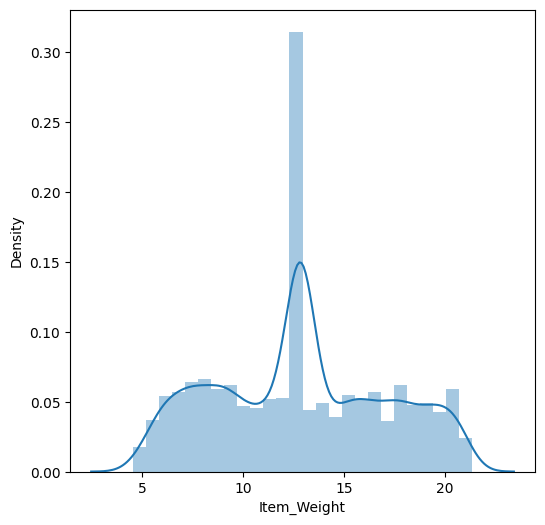

In [38]:
#Item weight Distribution
plt.figure(figsize =(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

# The plot shows maximum distributuon present in 'Item weight'

<ipython-input-39-8e47e4a25190>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


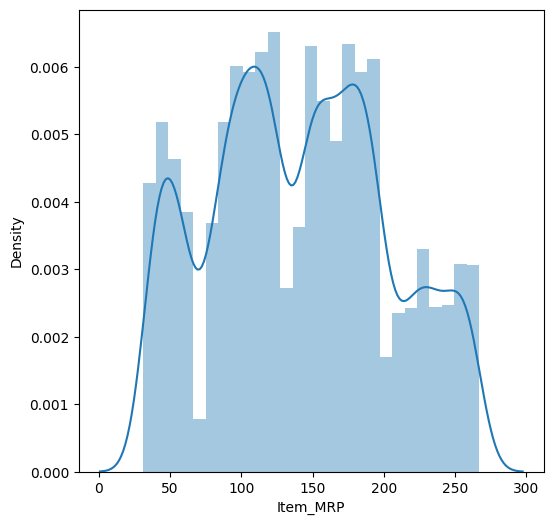

In [39]:
#Item_MRP	 Distribution
plt.figure(figsize =(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-40-3724f4c01c2d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


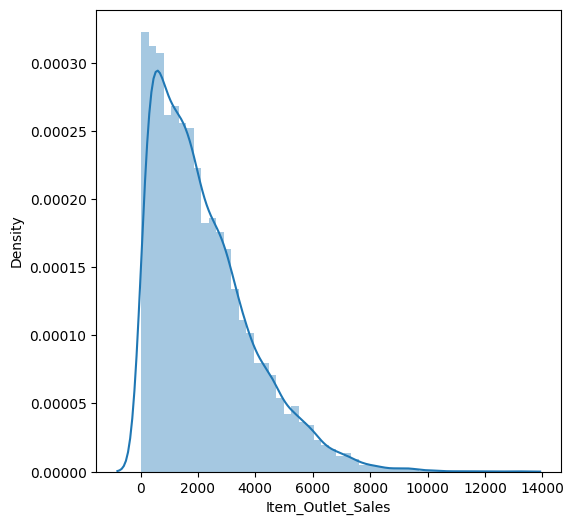

In [40]:
# Item_Outlet_Sales Distribution
plt.figure(figsize =(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

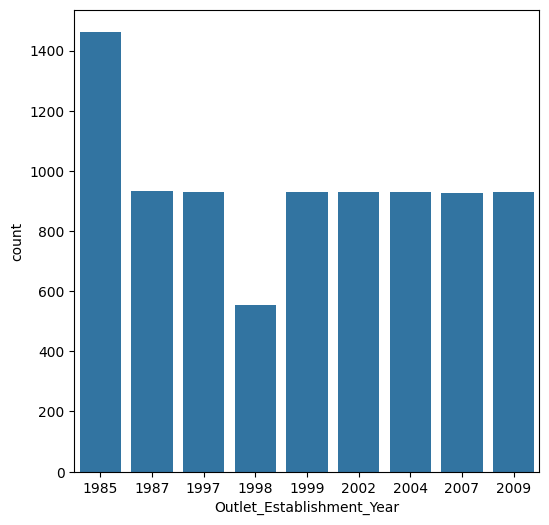

In [41]:
# Outlet_Establishment_Year
plt.figure(figsize =(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

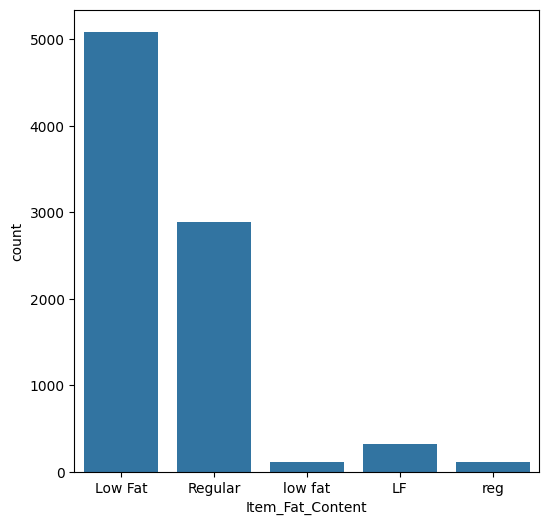

In [42]:
# Item_Fat_Content
plt.figure(figsize =(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

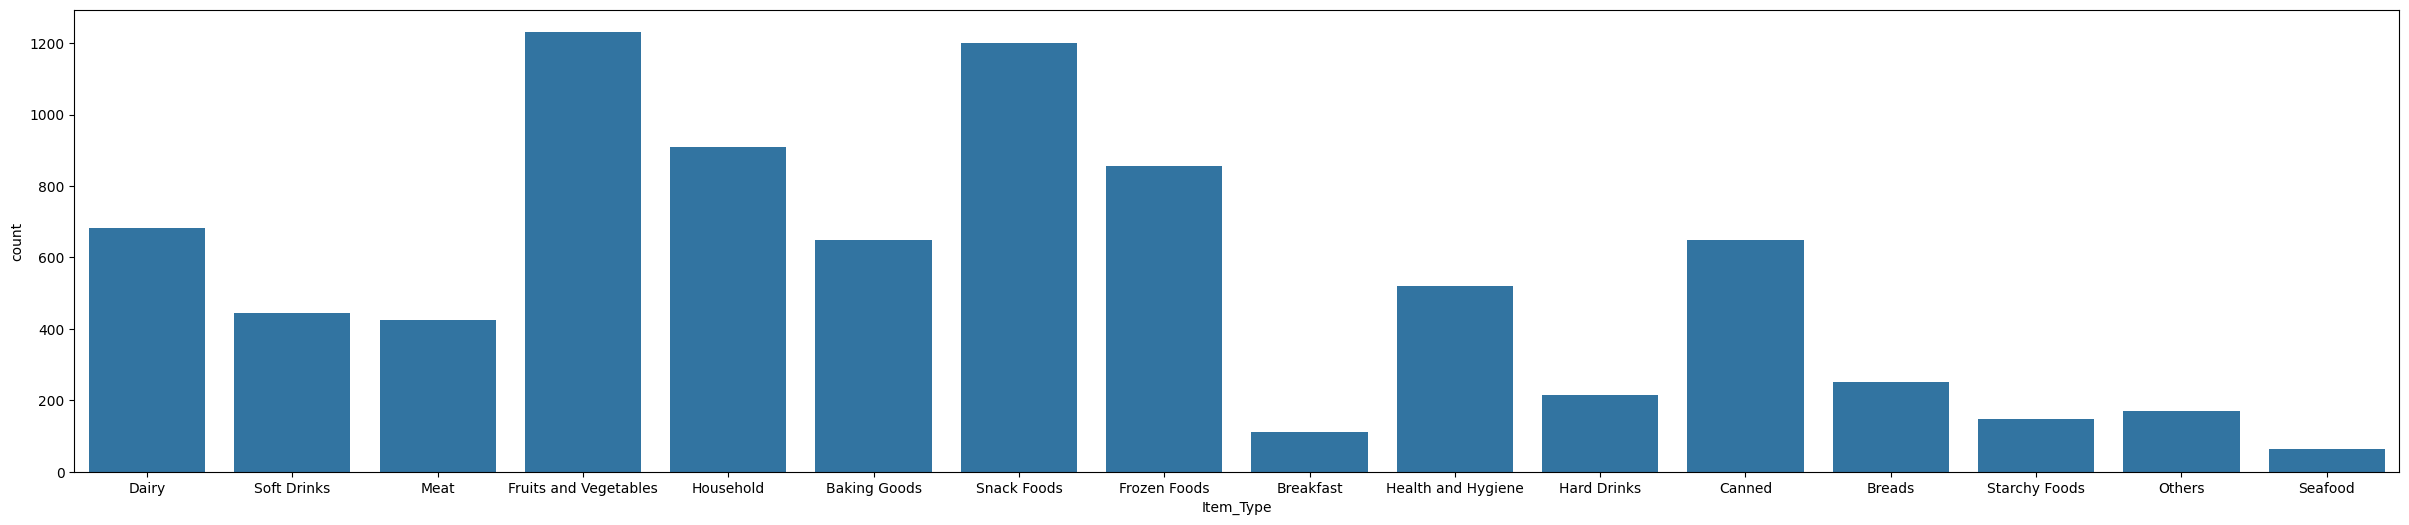

In [44]:
# Item_Type
plt.figure(figsize =(30,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

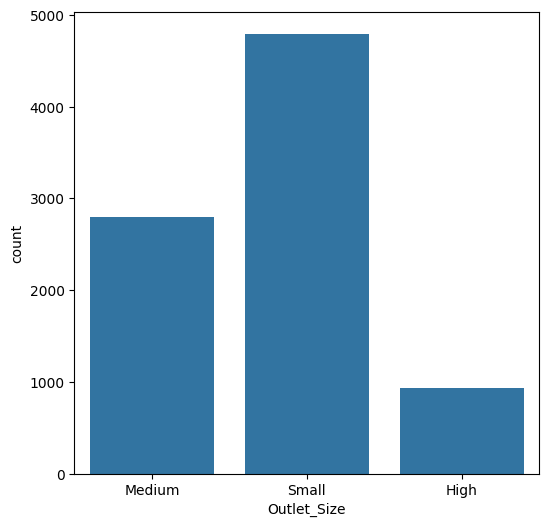

In [46]:
# Outlet_Size
plt.figure(figsize =(6,6))
sns.countplot(x='Outlet_Size',data=big_mart_data)
plt.show()

Data-Preprocessing

In [47]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [48]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [49]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

Label Encoding

In [56]:
encoder = LabelEncoder()

In [105]:
big_mart_data['Item_Identifier']= encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content']= encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type']= encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier']=encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Location_Type']= encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Size']=encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


In [106]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Features and Target

In [108]:
X = big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [109]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [110]:
Y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


Train and Test the model

In [111]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [112]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Linear Regression

In [140]:
model = LinearRegression()  # Here 'model' is the name of the model
model.fit(X_train,Y_train)

# predicting the  test set results
y_train_pred = model.predict(X_test)
y_train_pred

mse = mean_squared_error(Y_test,y_train_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(Y_test, y_train_pred))


RMSE : 1255.8241328615923
Variance score: 0.49


RandomForest

In [145]:
model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(X_train, Y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(Y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

print("Result :",model.score(X_train, Y_train))

[2364.881652 2424.217748 1690.080036 ... 2752.903234 3148.028902
 3464.729988]
RMSE : 1171.5965606040181
Variance score: 0.56
Result : 0.9387071311078784


Decision Tree

In [152]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

# predicting the test set results
y_pred = model.predict(X_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((Y_test - y_pred)**2).sum()/len(Y_test)))

[2450.144  3202.498  2498.0816 ... 2586.633  2848.9582 4074.696 ]
 RMSE :  1583.032079177557


In [147]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [148]:
# R2 Squared values

r2_train = metrics.r2_score(Y_train,y_train_pred)
r2_test = metrics.r2_score(Y_test,y_test_pred )

In [118]:
print('r_squared_value=', r2_train)

r_squared_value= 0.5071929167339231


In [119]:
print('r_squared_value=', r2_test)

r_squared_value= 0.48912987193626367


**Conclusion**

**Key Insights:**

Identified the primary factors affecting sales, such as item visibility, item type, outlet size, and location type.
Analyzed trends across various product categories and outlet types, highlighting which combinations drive higher revenue.

**Model Performance:**

Developed predictive models (e.g., Linear Regression, Decision Trees, Random Forests) to estimate sales.
Achieved a reasonable accuracy or R² score, indicating the model's capability to predict sales based on the provided features.

**Linear Regression (Baseline Model)**

Serves as a benchmark for comparison.
Useful when relationships between features and target are linear.

**Random Forest**

Captures non-linear patterns.

Handles missing values and outliers well.

Simple to interpret compared to boosting models.

**Decision Tree**

Sales data often involves non-linear interactions between features like outlet size, item type, and visibility. Decision trees excel at capturing these patterns.

Encode categorical variables (e.g., Outlet Location Type, Item Type) into numeric format using techniques like one-hot or label encoding.

Handle missing values in features such as Item_Weight and Outlet_Size.